# **HEART FAILURE PREDICTION USING ANN MODEL**

Cardiovascular diseases are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by Cardiovascular diseases. It is characterized by the heart’s inability to pump an adequate supply of blood to the body. Without sufficient blood flow, all major body functions are disrupted. Heart failure is a condition or a collection of symptoms that weaken the heart.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Uni/Machinelearning/heart_failure_clinical_records_dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

<a id="title-two"></a>
<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>LOADING DATA</center></h1>

In [ ]:
#loading data
data_df = pd.read_csv("/content/drive/MyDrive/Uni/Machinelearning/heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<div style="border-radius:10px;
            border : black solid;
            background-color: 	#FFFFF0;
            font-size:110%;
            text-align: left">

<h2 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center>About the data (Description of attributes)</center></h2>  
    
* **age:** Age of the patient
* **anaemia:** Haemoglobin level of patient (Boolean)
* **creatinine_phosphokinase:** Level of the CPK enzyme in the blood (mcg/L)
* **diabetes:** If the patient has diabetes (Boolean)
* **ejection_fraction:** Percentage of blood leaving the heart at each contraction
* **high_blood_pressure:** If the patient has hypertension (Boolean)
* **platelets:** Platelet count of blood (kiloplatelets/mL)
* **serum_creatinine:** Level of serum creatinine in the blood (mg/dL)
* **serum_sodium:** Level of serum sodium in the blood (mEq/L)
* **sex:** Sex of the patient
* **smoking:** If the patient smokes or not (Boolean)
* **time:** Follow-up period (days)
* **DEATH_EVENT:** If the patient deceased during the follow-up period (Boolean)

**[Attributes having Boolean values:** 0 = Negative (No); 1 = Positive (Yes)]

<a id="title-three"></a>
<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>DATA ANALYSIS</center></h1>

In [ ]:
# Checking for any missing values across the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### **Note:**
* There are 299 non-null values in all the attributes thus no missing values.
* Datatype is also either 'float64' or 'int64' which works well while feeded to an algorithm.

[Text(0, 0, '203')]

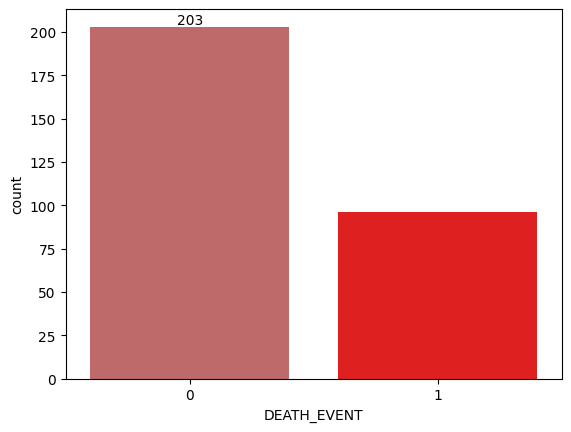

In [ ]:
#Evaluating the target and finding out the potential skewness in the data
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= data_df["DEATH_EVENT"], palette= cols)
ax.bar_label(ax.containers[0])

### **Note:**
* Target labels are 203 versus 96 thus there is an imbalance in the data.

In [ ]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Bivariate Analysis

<Axes: >

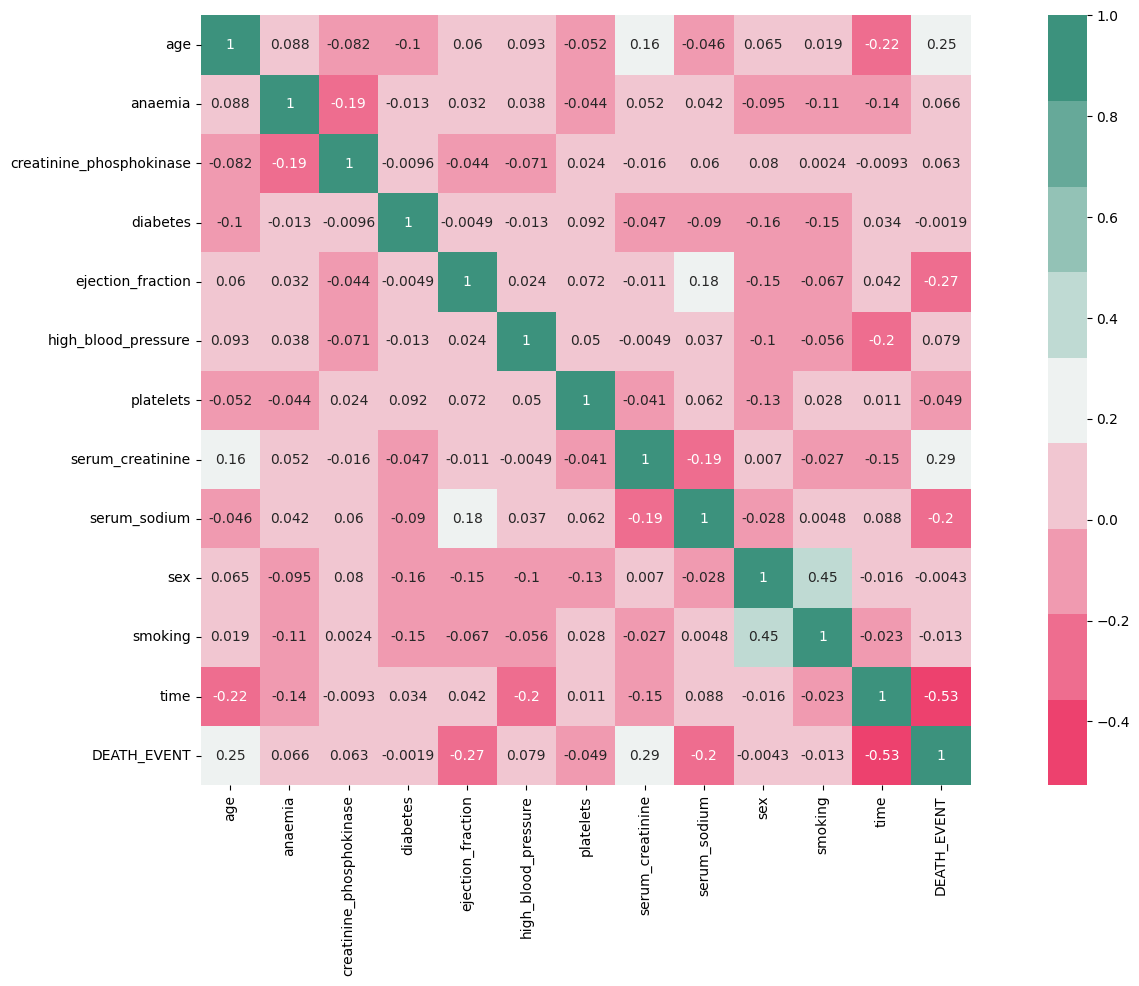

In [ ]:
#Doing Bivariate Analysis by examaning a corelation matrix of all the features using heatmap
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = data_df.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

### **Note:**
* "time" is the most important feature as it would've been very crucial to get diagnosed early with cardivascular issue so as to get timely treatment thus, reducing the chances of any fatality. (Evident from the inverse relationship)

* "serum_creatinine" is the next important feature as serum's (essential component of blood) abundancy in blood makes it easier for heart to function.

* "ejection_fraction" has also significant influence on target variable which is expected since it is basically the efficiency of the heart.

* Can be seen from the inverse relation pattern that heart's functioning declines with ageing.

## Evauating age distribution

> Indented block



Text(0.5, 1.0, 'Distribution Of Age')

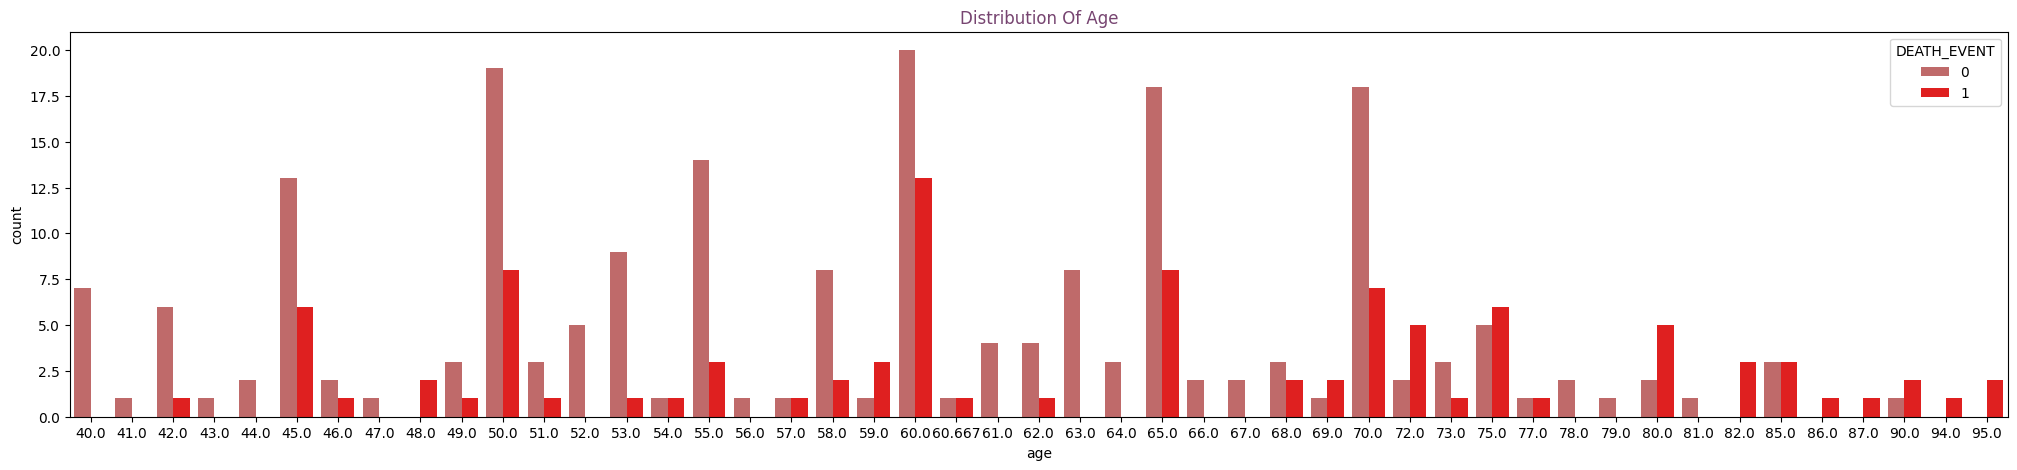

In [ ]:
#Evauating age distribution as per the deaths happened
plt.figure(figsize=(25,5))
Days_of_week=sns.countplot(x=data_df['age'],data=data_df, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

## DATA PREPROCESSING

In [ ]:
# Defining independent and dependent attributes in training and test sets
X=data_df.drop(["DEATH_EVENT"],axis=1)
y=data_df["DEATH_EVENT"]
print(X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [ ]:
print(X_scaled)

          age   anaemia  creatinine_phosphokinase  diabetes  \
0    1.192945 -0.871105                  0.000166 -0.847579   
1   -0.491279 -0.871105                  7.514640 -0.847579   
2    0.350833 -0.871105                 -0.449939 -0.847579   
3   -0.912335  1.147968                 -0.486071 -0.847579   
4    0.350833  1.147968                 -0.435486  1.179830   
..        ...       ...                       ...       ...   
294  0.098199 -0.871105                 -0.537688  1.179830   
295 -0.491279 -0.871105                  1.278215 -0.847579   
296 -1.333392 -0.871105                  1.525979  1.179830   
297 -1.333392 -0.871105                  1.890398 -0.847579   
298 -0.912335 -0.871105                 -0.398321 -0.847579   

     ejection_fraction  high_blood_pressure     platelets  serum_creatinine  \
0            -1.530560             1.359272  1.681648e-02          0.490057   
1            -0.007077            -0.735688  7.535660e-09         -0.284552   
2     

In [ ]:
#spliting variables into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

# **MODEL BUILDING**

## <a id = "title-six"></a>**<span style="color:#CD5C5C;"> Artificial Neural Network (ANN) </span>**

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 25, epochs = 50,callbacks=[early_stopping], validation_split=0.25)

Epoch 1/50
7/7 [==============================] - 1s 29ms/step - loss: 0.6927 - accuracy: 0.6282 - val_loss: 0.6907 - val_accuracy: 0.8302
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.6346 - val_loss: 0.6885 - val_accuracy: 0.8302
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.6346 - val_loss: 0.6865 - val_accuracy: 0.8302
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.6346 - val_loss: 0.6843 - val_accuracy: 0.8302
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6892 - accuracy: 0.6346 - val_loss: 0.6818 - val_accuracy: 0.8302
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.6346 - val_loss: 0.6790 - val_accuracy: 0.8302
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6869 - accuracy: 0.6346 - val_loss: 0.6760 - val_accuracy: 0.8302
Epoch 8/50
7/7 [=================

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 84.83%


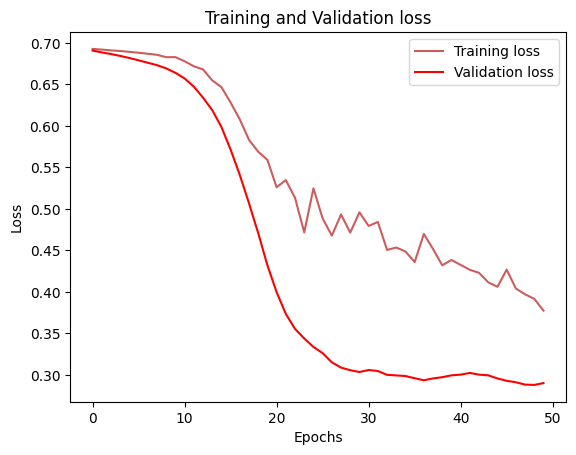

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

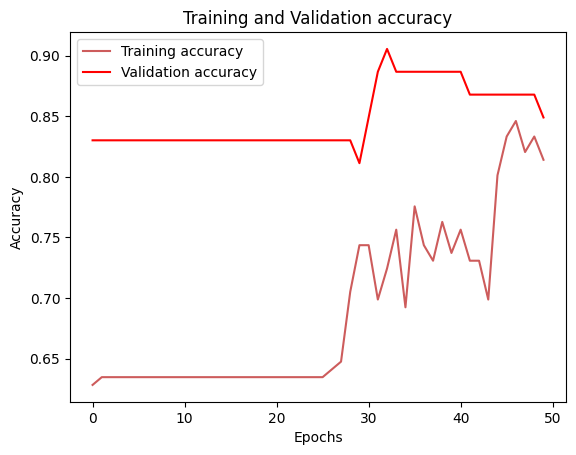

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## <a id = "title-six"></a>**<span style="color:#CD5C5C;">Predicting the test set results </span>**

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()


3/3 [==============================] - 0s 2ms/step


## <a id = "title-six"></a>**<span style="color:#CD5C5C;">Confusion Matrix</span>**

<Axes: >

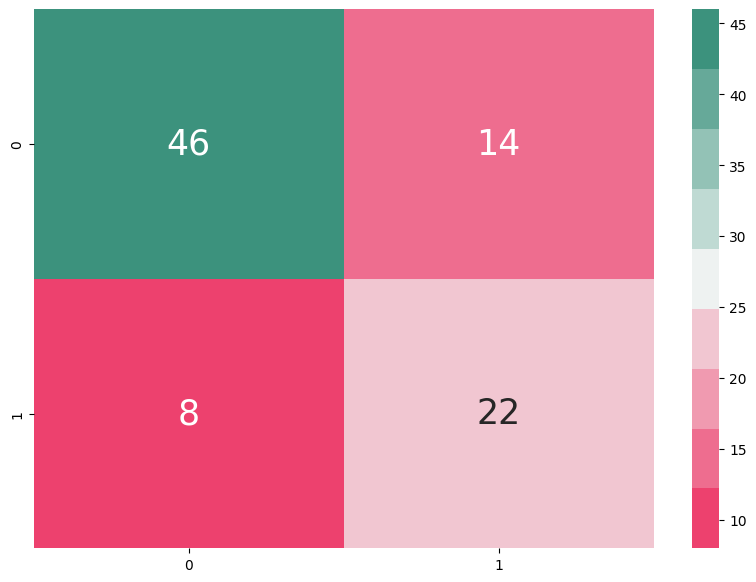

In [ ]:
# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':25})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        60
           1       0.61      0.73      0.67        30

    accuracy                           0.76        90
   macro avg       0.73      0.75      0.74        90
weighted avg       0.77      0.76      0.76        90

